# Indexing Protected Planet

Example notebook on how to index protected planet

In [1]:
import json
from datetime import datetime
from pathlib import Path

import contextily as cx
import pandas as pd
import requests
from h3ronpy.arrow import cells_parse
from h3ronpy.pandas.vector import cells_dataframe_to_geodataframe

from worldex.datasets.protectedplanet import ProtectedPlanetDataset

In [2]:
datasets = [{"url":"https://www.protectedplanet.net/country/AFG","country":"Afghanistan"},{"url":"https://www.protectedplanet.net/country/ALA","country":"Åland Islands"},{"url":"https://www.protectedplanet.net/country/ALB","country":"Albania"},{"url":"https://www.protectedplanet.net/country/DZA","country":"Algeria"},{"url":"https://www.protectedplanet.net/country/ASM","country":"American Samoa"},{"url":"https://www.protectedplanet.net/country/AND","country":"Andorra"},{"url":"https://www.protectedplanet.net/country/AGO","country":"Angola"},{"url":"https://www.protectedplanet.net/country/AIA","country":"Anguilla"},{"url":"https://www.protectedplanet.net/country/ATG","country":"Antigua and Barbuda"},{"url":"https://www.protectedplanet.net/country/ARG","country":"Argentina"},{"url":"https://www.protectedplanet.net/country/ARM","country":"Armenia"},{"url":"https://www.protectedplanet.net/country/ABW","country":"Aruba"},{"url":"https://www.protectedplanet.net/country/AUS","country":"Australia"},{"url":"https://www.protectedplanet.net/country/AUT","country":"Austria"},{"url":"https://www.protectedplanet.net/country/AZE","country":"Azerbaijan"},{"url":"https://www.protectedplanet.net/country/BHS","country":"Bahamas"},{"url":"https://www.protectedplanet.net/country/BHR","country":"Bahrain"},{"url":"https://www.protectedplanet.net/country/BGD","country":"Bangladesh"},{"url":"https://www.protectedplanet.net/country/BRB","country":"Barbados"},{"url":"https://www.protectedplanet.net/country/BLR","country":"Belarus"},{"url":"https://www.protectedplanet.net/country/BEL","country":"Belgium"},{"url":"https://www.protectedplanet.net/country/BLZ","country":"Belize"},{"url":"https://www.protectedplanet.net/country/BEN","country":"Benin"},{"url":"https://www.protectedplanet.net/country/BMU","country":"Bermuda"},{"url":"https://www.protectedplanet.net/country/BTN","country":"Bhutan"},{"url":"https://www.protectedplanet.net/country/BOL","country":"Bolivia (Plurinational State of)"},{"url":"https://www.protectedplanet.net/country/BES","country":"Bonaire, Sint Eustatius, and Saba"},{"url":"https://www.protectedplanet.net/country/BIH","country":"Bosnia and Herzegovina"},{"url":"https://www.protectedplanet.net/country/BWA","country":"Botswana"},{"url":"https://www.protectedplanet.net/country/BVT","country":"Bouvet Island"},{"url":"https://www.protectedplanet.net/country/BRA","country":"Brazil"},{"url":"https://www.protectedplanet.net/country/IOT","country":"British Indian Ocean Territory"},{"url":"https://www.protectedplanet.net/country/VGB","country":"British Virgin Islands"},{"url":"https://www.protectedplanet.net/country/BRN","country":"Brunei Darussalam"},{"url":"https://www.protectedplanet.net/country/BGR","country":"Bulgaria"},{"url":"https://www.protectedplanet.net/country/BFA","country":"Burkina Faso"},{"url":"https://www.protectedplanet.net/country/BDI","country":"Burundi"},{"url":"https://www.protectedplanet.net/country/KHM","country":"Cambodia"},{"url":"https://www.protectedplanet.net/country/CMR","country":"Cameroon"},{"url":"https://www.protectedplanet.net/country/CAN","country":"Canada"},{"url":"https://www.protectedplanet.net/country/CPV","country":"Cabo Verde"},{"url":"https://www.protectedplanet.net/country/CYM","country":"Cayman Islands"},{"url":"https://www.protectedplanet.net/country/CAF","country":"Central African Republic"},{"url":"https://www.protectedplanet.net/country/TCD","country":"Chad"},{"url":"https://www.protectedplanet.net/country/CHL","country":"Chile"},{"url":"https://www.protectedplanet.net/country/CHN","country":"China"},{"url":"https://www.protectedplanet.net/country/CXR","country":"Christmas Island"},{"url":"https://www.protectedplanet.net/country/CCK","country":"Cocos (Keeling) Islands"},{"url":"https://www.protectedplanet.net/country/COL","country":"Colombia"},{"url":"https://www.protectedplanet.net/country/COM","country":"Comoros"},{"url":"https://www.protectedplanet.net/country/COG","country":"Congo"},{"url":"https://www.protectedplanet.net/country/COD","country":"Democratic Republic of the Congo"},{"url":"https://www.protectedplanet.net/country/COK","country":"Cook Islands"},{"url":"https://www.protectedplanet.net/country/CRI","country":"Costa Rica"},{"url":"https://www.protectedplanet.net/country/HRV","country":"Croatia"},{"url":"https://www.protectedplanet.net/country/CUB","country":"Cuba"},{"url":"https://www.protectedplanet.net/country/CUW","country":"Curaçao"},{"url":"https://www.protectedplanet.net/country/CYP","country":"Cyprus"},{"url":"https://www.protectedplanet.net/country/CZE","country":"Czechia"},{"url":"https://www.protectedplanet.net/country/DNK","country":"Denmark"},{"url":"https://www.protectedplanet.net/country/DJI","country":"Djibouti"},{"url":"https://www.protectedplanet.net/country/DMA","country":"Dominica"},{"url":"https://www.protectedplanet.net/country/DOM","country":"Dominican Republic"},{"url":"https://www.protectedplanet.net/country/ECU","country":"Ecuador"},{"url":"https://www.protectedplanet.net/country/EGY","country":"Egypt"},{"url":"https://www.protectedplanet.net/country/SLV","country":"El Salvador"},{"url":"https://www.protectedplanet.net/country/GNQ","country":"Equatorial Guinea"},{"url":"https://www.protectedplanet.net/country/ERI","country":"Eritrea"},{"url":"https://www.protectedplanet.net/country/EST","country":"Estonia"},{"url":"https://www.protectedplanet.net/country/ETH","country":"Ethiopia"},{"url":"https://www.protectedplanet.net/country/FLK","country":"Falkland Islands (Malvinas)"},{"url":"https://www.protectedplanet.net/country/FRO","country":"Faroe Islands"},{"url":"https://www.protectedplanet.net/country/FJI","country":"Fiji"},{"url":"https://www.protectedplanet.net/country/FIN","country":"Finland"},{"url":"https://www.protectedplanet.net/country/FRA","country":"France"},{"url":"https://www.protectedplanet.net/country/GUF","country":"French Guiana"},{"url":"https://www.protectedplanet.net/country/PYF","country":"French Polynesia"},{"url":"https://www.protectedplanet.net/country/ATF","country":"Terres australes et antarctiques françaises"},{"url":"https://www.protectedplanet.net/country/GAB","country":"Gabon"},{"url":"https://www.protectedplanet.net/country/GMB","country":"Gambia"},{"url":"https://www.protectedplanet.net/country/GEO","country":"Georgia"},{"url":"https://www.protectedplanet.net/country/DEU","country":"Germany"},{"url":"https://www.protectedplanet.net/country/GHA","country":"Ghana"},{"url":"https://www.protectedplanet.net/country/GIB","country":"Gibraltar"},{"url":"https://www.protectedplanet.net/country/GRC","country":"Greece"},{"url":"https://www.protectedplanet.net/country/GRL","country":"Greenland"},{"url":"https://www.protectedplanet.net/country/GRD","country":"Grenada"},{"url":"https://www.protectedplanet.net/country/GLP","country":"Guadeloupe"},{"url":"https://www.protectedplanet.net/country/GUM","country":"Guam"},{"url":"https://www.protectedplanet.net/country/GTM","country":"Guatemala"},{"url":"https://www.protectedplanet.net/country/GGY","country":"Guernsey"},{"url":"https://www.protectedplanet.net/country/GIN","country":"Guinea"},{"url":"https://www.protectedplanet.net/country/GNB","country":"Guinea-Bissau"},{"url":"https://www.protectedplanet.net/country/GUY","country":"Guyana"},{"url":"https://www.protectedplanet.net/country/HTI","country":"Haiti"},{"url":"https://www.protectedplanet.net/country/HMD","country":"Heard Island and McDonald Islands"},{"url":"https://www.protectedplanet.net/country/VAT","country":"Holy See"},{"url":"https://www.protectedplanet.net/country/HND","country":"Honduras"},{"url":"https://www.protectedplanet.net/country/HKG","country":"Hong Kong, SAR China"},{"url":"https://www.protectedplanet.net/country/HUN","country":"Hungary"},{"url":"https://www.protectedplanet.net/country/ISL","country":"Iceland"},{"url":"https://www.protectedplanet.net/country/IND","country":"India"},{"url":"https://www.protectedplanet.net/country/IDN","country":"Indonesia"},{"url":"https://www.protectedplanet.net/country/CIV","country":"Côte D'Ivoire"},{"url":"https://www.protectedplanet.net/country/IRN","country":"Iran (Islamic Republic Of)"},{"url":"https://www.protectedplanet.net/country/IRQ","country":"Iraq"},{"url":"https://www.protectedplanet.net/country/IRL","country":"Ireland"},{"url":"https://www.protectedplanet.net/country/IMN","country":"Isle of Man"},{"url":"https://www.protectedplanet.net/country/ISR","country":"Israel"},{"url":"https://www.protectedplanet.net/country/ITA","country":"Italy"},{"url":"https://www.protectedplanet.net/country/JAM","country":"Jamaica"},{"url":"https://www.protectedplanet.net/country/JPN","country":"Japan"},{"url":"https://www.protectedplanet.net/country/JEY","country":"Jersey"},{"url":"https://www.protectedplanet.net/country/JOR","country":"Jordan"},{"url":"https://www.protectedplanet.net/country/KAZ","country":"Kazakhstan"},{"url":"https://www.protectedplanet.net/country/KEN","country":"Kenya"},{"url":"https://www.protectedplanet.net/country/KIR","country":"Kiribati"},{"url":"https://www.protectedplanet.net/country/KWT","country":"Kuwait"},{"url":"https://www.protectedplanet.net/country/KGZ","country":"Kyrgyzstan"},{"url":"https://www.protectedplanet.net/country/LAO","country":"Lao People's Democratic Republic"},{"url":"https://www.protectedplanet.net/country/LVA","country":"Latvia"},{"url":"https://www.protectedplanet.net/country/LBN","country":"Lebanon"},{"url":"https://www.protectedplanet.net/country/LSO","country":"Lesotho"},{"url":"https://www.protectedplanet.net/country/LBR","country":"Liberia"},{"url":"https://www.protectedplanet.net/country/LBY","country":"Libya"},{"url":"https://www.protectedplanet.net/country/LIE","country":"Liechtenstein"},{"url":"https://www.protectedplanet.net/country/LTU","country":"Lithuania"},{"url":"https://www.protectedplanet.net/country/LUX","country":"Luxembourg"},{"url":"https://www.protectedplanet.net/country/MAC","country":"Macau, SAR China"},{"url":"https://www.protectedplanet.net/country/MKD","country":"The Republic of North Macedonia"},{"url":"https://www.protectedplanet.net/country/MDG","country":"Madagascar"},{"url":"https://www.protectedplanet.net/country/MWI","country":"Malawi"},{"url":"https://www.protectedplanet.net/country/MYS","country":"Malaysia"},{"url":"https://www.protectedplanet.net/country/MDV","country":"Maldives"},{"url":"https://www.protectedplanet.net/country/MLI","country":"Mali"},{"url":"https://www.protectedplanet.net/country/MLT","country":"Malta"},{"url":"https://www.protectedplanet.net/country/MHL","country":"Marshall Islands"},{"url":"https://www.protectedplanet.net/country/MTQ","country":"Martinique"},{"url":"https://www.protectedplanet.net/country/MRT","country":"Mauritania"},{"url":"https://www.protectedplanet.net/country/MUS","country":"Mauritius"},{"url":"https://www.protectedplanet.net/country/MYT","country":"Mayotte"},{"url":"https://www.protectedplanet.net/country/MEX","country":"Mexico"},{"url":"https://www.protectedplanet.net/country/FSM","country":"Micronesia (Federated States of)"},{"url":"https://www.protectedplanet.net/country/MDA","country":"Republic of Moldova"},{"url":"https://www.protectedplanet.net/country/MCO","country":"Monaco"},{"url":"https://www.protectedplanet.net/country/MNG","country":"Mongolia"},{"url":"https://www.protectedplanet.net/country/MNE","country":"Montenegro"},{"url":"https://www.protectedplanet.net/country/MSR","country":"Montserrat"},{"url":"https://www.protectedplanet.net/country/MAR","country":"Morocco"},{"url":"https://www.protectedplanet.net/country/MOZ","country":"Mozambique"},{"url":"https://www.protectedplanet.net/country/MMR","country":"Myanmar"},{"url":"https://www.protectedplanet.net/country/NAM","country":"Namibia"},{"url":"https://www.protectedplanet.net/country/NRU","country":"Nauru"},{"url":"https://www.protectedplanet.net/country/NPL","country":"Nepal"},{"url":"https://www.protectedplanet.net/country/NLD","country":"Netherlands"},{"url":"https://www.protectedplanet.net/country/NCL","country":"New Caledonia"},{"url":"https://www.protectedplanet.net/country/NZL","country":"New Zealand"},{"url":"https://www.protectedplanet.net/country/NIC","country":"Nicaragua"},{"url":"https://www.protectedplanet.net/country/NER","country":"Niger"},{"url":"https://www.protectedplanet.net/country/NGA","country":"Nigeria"},{"url":"https://www.protectedplanet.net/country/NIU","country":"Niue"},{"url":"https://www.protectedplanet.net/country/NFK","country":"Norfolk Island"},{"url":"https://www.protectedplanet.net/country/PRK","country":"Democratic People's Republic Of Korea"},{"url":"https://www.protectedplanet.net/country/MNP","country":"Northern Mariana Islands"},{"url":"https://www.protectedplanet.net/country/NOR","country":"Norway"},{"url":"https://www.protectedplanet.net/country/OMN","country":"Oman"},{"url":"https://www.protectedplanet.net/country/PAK","country":"Pakistan"},{"url":"https://www.protectedplanet.net/country/PLW","country":"Palau"},{"url":"https://www.protectedplanet.net/country/PSE","country":"Palestine, State of"},{"url":"https://www.protectedplanet.net/country/PAN","country":"Panama"},{"url":"https://www.protectedplanet.net/country/PNG","country":"Papua New Guinea"},{"url":"https://www.protectedplanet.net/country/PRY","country":"Paraguay"},{"url":"https://www.protectedplanet.net/country/PER","country":"Peru"},{"url":"https://www.protectedplanet.net/country/PHL","country":"Philippines"},{"url":"https://www.protectedplanet.net/country/PCN","country":"Pitcairn Islands"},{"url":"https://www.protectedplanet.net/country/POL","country":"Poland"},{"url":"https://www.protectedplanet.net/country/PRT","country":"Portugal"},{"url":"https://www.protectedplanet.net/country/PRI","country":"Puerto Rico"},{"url":"https://www.protectedplanet.net/country/QAT","country":"Qatar"},{"url":"https://www.protectedplanet.net/country/REU","country":"Réunion"},{"url":"https://www.protectedplanet.net/country/ROU","country":"Romania"},{"url":"https://www.protectedplanet.net/country/RUS","country":"Russian Federation"},{"url":"https://www.protectedplanet.net/country/RWA","country":"Rwanda"},{"url":"https://www.protectedplanet.net/country/BLM","country":"Saint Barthélemy"},{"url":"https://www.protectedplanet.net/country/SHN","country":"Saint Helena, Ascension and Tristan da Cunha"},{"url":"https://www.protectedplanet.net/country/KNA","country":"Saint Kitts and Nevis"},{"url":"https://www.protectedplanet.net/country/LCA","country":"Saint Lucia"},{"url":"https://www.protectedplanet.net/country/MAF","country":"Saint Martin"},{"url":"https://www.protectedplanet.net/country/SPM","country":"Saint Pierre and Miquelon"},{"url":"https://www.protectedplanet.net/country/VCT","country":"Saint Vincent and the Grenadines"},{"url":"https://www.protectedplanet.net/country/WSM","country":"Samoa"},{"url":"https://www.protectedplanet.net/country/SMR","country":"San Marino"},{"url":"https://www.protectedplanet.net/country/STP","country":"São Tomé and Príncipe"},{"url":"https://www.protectedplanet.net/country/SAU","country":"Saudi Arabia"},{"url":"https://www.protectedplanet.net/country/SEN","country":"Senegal"},{"url":"https://www.protectedplanet.net/country/SRB","country":"Serbia"},{"url":"https://www.protectedplanet.net/country/SYC","country":"Seychelles"},{"url":"https://www.protectedplanet.net/country/SLE","country":"Sierra Leone"},{"url":"https://www.protectedplanet.net/country/SGP","country":"Singapore"},{"url":"https://www.protectedplanet.net/country/SXM","country":"Sint Maarten"},{"url":"https://www.protectedplanet.net/country/SVK","country":"Slovakia"},{"url":"https://www.protectedplanet.net/country/SVN","country":"Slovenia"},{"url":"https://www.protectedplanet.net/country/SLB","country":"Solomon Islands"},{"url":"https://www.protectedplanet.net/country/SOM","country":"Somalia"},{"url":"https://www.protectedplanet.net/country/ZAF","country":"South Africa"},{"url":"https://www.protectedplanet.net/country/SGS","country":"South Georgia and the South Sandwich Islands"},{"url":"https://www.protectedplanet.net/country/KOR","country":"Republic Of Korea"},{"url":"https://www.protectedplanet.net/country/SSD","country":"South Sudan"},{"url":"https://www.protectedplanet.net/country/ESP","country":"Spain"},{"url":"https://www.protectedplanet.net/country/LKA","country":"Sri Lanka"},{"url":"https://www.protectedplanet.net/country/SDN","country":"Sudan"},{"url":"https://www.protectedplanet.net/country/SUR","country":"Suriname"},{"url":"https://www.protectedplanet.net/country/SJM","country":"Svalbard and Jan Mayen"},{"url":"https://www.protectedplanet.net/country/SWZ","country":"Eswatini, the Kingdom of"},{"url":"https://www.protectedplanet.net/country/SWE","country":"Sweden"},{"url":"https://www.protectedplanet.net/country/CHE","country":"Switzerland"},{"url":"https://www.protectedplanet.net/country/SYR","country":"Syrian Arab Republic"},{"url":"https://www.protectedplanet.net/country/TWN","country":"Taiwan, Province of China"},{"url":"https://www.protectedplanet.net/country/TJK","country":"Tajikistan"},{"url":"https://www.protectedplanet.net/country/TZA","country":"United Republic of Tanzania"},{"url":"https://www.protectedplanet.net/country/THA","country":"Thailand"},{"url":"https://www.protectedplanet.net/country/TLS","country":"Timor-Leste"},{"url":"https://www.protectedplanet.net/country/TGO","country":"Togo"},{"url":"https://www.protectedplanet.net/country/TKL","country":"Tokelau"},{"url":"https://www.protectedplanet.net/country/TON","country":"Tonga"},{"url":"https://www.protectedplanet.net/country/TTO","country":"Trinidad and Tobago"},{"url":"https://www.protectedplanet.net/country/TUN","country":"Tunisia"},{"url":"https://www.protectedplanet.net/country/TUR","country":"Türkiye"},{"url":"https://www.protectedplanet.net/country/TKM","country":"Turkmenistan"},{"url":"https://www.protectedplanet.net/country/TCA","country":"Turks and Caicos Islands"},{"url":"https://www.protectedplanet.net/country/TUV","country":"Tuvalu"},{"url":"https://www.protectedplanet.net/country/UGA","country":"Uganda"},{"url":"https://www.protectedplanet.net/country/UKR","country":"Ukraine"},{"url":"https://www.protectedplanet.net/country/ARE","country":"United Arab Emirates"},{"url":"https://www.protectedplanet.net/country/GBR","country":"United Kingdom of Great Britain and Northern Ireland"},{"url":"https://www.protectedplanet.net/country/USA","country":"United States of America"},{"url":"https://www.protectedplanet.net/country/UMI","country":"United States Minor Outlying Islands"},{"url":"https://www.protectedplanet.net/country/VIR","country":"United States Virgin Islands"},{"url":"https://www.protectedplanet.net/country/URY","country":"Uruguay"},{"url":"https://www.protectedplanet.net/country/UZB","country":"Uzbekistan"},{"url":"https://www.protectedplanet.net/country/VUT","country":"Vanuatu"},{"url":"https://www.protectedplanet.net/country/VEN","country":"Venezuela (Bolivarian Republic of)"},{"url":"https://www.protectedplanet.net/country/VNM","country":"Viet Nam"},{"url":"https://www.protectedplanet.net/country/WLF","country":"Wallis and Futuna"},{"url":"https://www.protectedplanet.net/country/ESH","country":"Western Sahara"},{"url":"https://www.protectedplanet.net/country/YEM","country":"Yemen"},{"url":"https://www.protectedplanet.net/country/ZMB","country":"Zambia"},{"url":"https://www.protectedplanet.net/country/ZWE","country":"Zimbabwe"}]

In [3]:
data = datasets[1]
data

{'url': 'https://www.protectedplanet.net/country/ALA',
 'country': 'Åland Islands'}

In [4]:
# Create dir to save files
path = Path(f"../data/protectedplanet/{data['country']}")
path.mkdir(parents=True, exist_ok=True)

In [5]:
url = data['url']
country_code = data['url'].split('/')[-1]
country = data['country']
name = f"World Database on Protected Areas - {country}"
country_code = data['url'].split('/')[-1]
download_response = requests.post("https://www.protectedplanet.net/downloads", json={"domain":"general","format":"shp","token":country_code,"id":72974}).json()
dataurl = download_response['url']


description = """The World Database on Protected Areas (WDPA) is a joint project of UNEP and the International Union for Conservation of Nature (IUCN). It is compiled and managed by the UN Environment Programme World Conservation Monitoring Centre (UNEP-WCMC), in collaboration with governments, non-governmental organisations, and other data-providers. The WDPA is the most comprehensive global database of marine and terrestrial protected areas, comprising both spatial data (i.e. boundaries and points) with associated attribute data (i.e. tabular information). It is made available online through Protected Planet (www.protectedplanet.net) where the data are both viewable and downloadable. A detailed examination of the history, uses, challenges and future directions of the WDPA can be found in Bingham et al. 2019."""
dataset = ProtectedPlanetDataset(
    name=name,
    last_fetched=datetime.now().isoformat(),
    files=[dataurl],
    data_format="Shapefile",
    description=description,
    projection="EPSG:4326",
    keywords=[],
    date_start=None,
    date_end=None,
    accessibility="public/open",
    url=url,
)
dataset.set_dir(path)
dataset.index()

,h3_index
0,8808836291fffff
1,8808836293fffff
2,8808836295fffff
3,8808836297fffff
4,880883629bfffff
...,...
959,8808835b67fffff
960,8808835b69fffff
961,8808835b6bfffff
962,8808835b6dfffff


In [6]:
with open(path / "metadata.json") as f:
    metadata = json.load(f)

metadata

{'id': 'f3bdd537-5feb-46e4-835d-38dc55a6ceb7',
 'name': 'World Database on Protected Areas - Åland Islands',
 'source_org': 'Protected Planet',
 'last_fetched': '2024-03-22T09:53:01.343198',
 'files': ['https://d1gam3xoknrgr2.cloudfront.net/current/WDPA_WDOECM_Mar2024_Public_ALA_shp.zip'],
 'description': 'The World Database on Protected Areas (WDPA) is a joint project of UNEP and the International Union for Conservation of Nature (IUCN). It is compiled and managed by the UN Environment Programme World Conservation Monitoring Centre (UNEP-WCMC), in collaboration with governments, non-governmental organisations, and other data-providers. The WDPA is the most comprehensive global database of marine and terrestrial protected areas, comprising both spatial data (i.e. boundaries and points) with associated attribute data (i.e. tabular information). It is made available online through Protected Planet (www.protectedplanet.net) where the data are both viewable and downloadable. A detailed exa

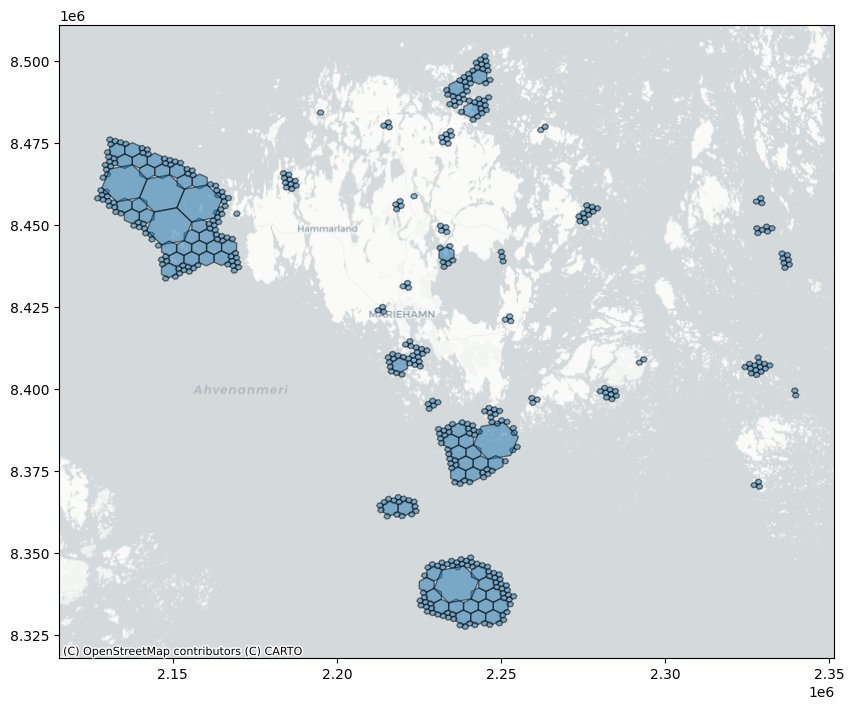

In [7]:
h3 = pd.read_parquet(path / "h3-compact.parquet")

h3_gdf = cells_dataframe_to_geodataframe(
    pd.DataFrame({"cell": cells_parse(h3.h3_index)})
)
h3_gdf_reprojected = h3_gdf.to_crs(epsg=3857)
ax = h3_gdf_reprojected.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)